

```
🍕 CLUSTERIZAÇÃO DOS DADOS DE PIZZA

MACHINE LEARN - UTILIZANDO O ALGORITIMO K.MEANS PARA SEGMENTAÇÃO DE ALIMENTOS.
ONDE TEREMOS OS INGREDIENTES AGRUPADOS DE ACORDO COM AS CATEGORIAS.

-OBJETIVOS:

> MOSTRAR DADOS DOS INGREDIENTES DE PIZZA DA BASE DE DADOS "MODEL_SALES_PIZZA"

> AGRUPANDO OS DADOS UTILIZANDO O ALGORITIMO KMEANS (ALGORITIMO DE CLASSIFICAÇÃO DE DADOS NÃO SUPERVISIONADO)

> MOSTRAR DADOS ESTATISTICOS E MELHOR ENTENDIMENTO DOS DADOS.

ESCOPO DO PROJETO:

> Categorização de produtos:

> Categorização de alimentos.
O objetivo da clusterização de produtos pode ser agrupar os itens com base no perfil de compra
dos clientes.
Normalmente, isso é feito tendo o comportamento de aquisição como parâmetro central.
Na prática, esse exercício serve muito bem a organizações que lidam com um mix de
produtos gigantes, como é o caso dos distribuidores, varejos e atacadistas cujo giro de
mercadorias é grande.

Fazer uso do K-Means.






**Importando as bibliotecas necessárias**

In [ ]:
!pip3 install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import KBinsDiscretizer
import plotly.graph_objects as go
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import mplcursors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import plotly.graph_objects as go



**Montando diretório drive contendo a base**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Lendo DataSet**

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataModelPizzaSales.xlsx')

In [ ]:
data

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


**Definindo as colunas dados que iremos utilizar**( separando as colunas do DF original )

In [ ]:
columns_select = ["order_details_id", "quantity", "unit_price", "pizza_size", 'pizza_category', 'pizza_ingredients']
data_S = data[columns_select]

In [ ]:
data_S.head()

,order_details_id,quantity,unit_price,pizza_size,pizza_category,pizza_ingredients
0,1,1,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,1,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,1,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,1,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,1,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


**Normalizando os dados para serem utilizados**

> Codificação One-Hot para a coluna "pizza_category"

> Codificação TF-IDF para a coluna "pizza_ingredients"





In [ ]:
encoded_data = pd.DataFrame()
encoder = OneHotEncoder()
pizza_category_encoded = encoder.fit_transform(data_S[['pizza_category']]).toarray()
vectorizer = TfidfVectorizer()
pizza_ingredients_encoded = vectorizer.fit_transform(data_S['pizza_ingredients']).toarray()
pizza_category_encoded = pd.DataFrame(pizza_category_encoded, columns=encoder.get_feature_names_out())
pizza_ingredients_encoded = pd.DataFrame(pizza_ingredients_encoded, columns=vectorizer.get_feature_names_out())
pizza_size_encoded = pd.get_dummies(data_S['pizza_size'])
encoded_data = pd.concat([pizza_category_encoded, pizza_ingredients_encoded, pizza_size_encoded], axis=1)

In [ ]:
new_column_names = {
    'pizza_category_Chicken': 'Pizza de Frango',
    'pizza_category_Classic': 'Pizza Classica',
    'pizza_category_Supreme': 'Supreme',
    'pizza_category_Veggie': 'Vegetariana'
}

encoded_data = encoded_data.rename(columns=new_column_names)

In [ ]:
encoded_data.head()

,Pizza de Frango,Pizza Classica,Supreme,Vegetariana,alfredo,anchovies,artichoke,artichokes,arugula,asiago,...,thyme,tomatoes,verdi,zucchini,慛duja,L,M,S,XL,XXL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0,1,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0,1,0,0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,1,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.203056,0.0,0.0,0.0,1,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.166225,0.0,0.0,0.0,0,1,0,0,0


**Grafico ingrediente x Categoria**

<ipython-input-77-743b8e3ce874>:12: UserWarning:

Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.



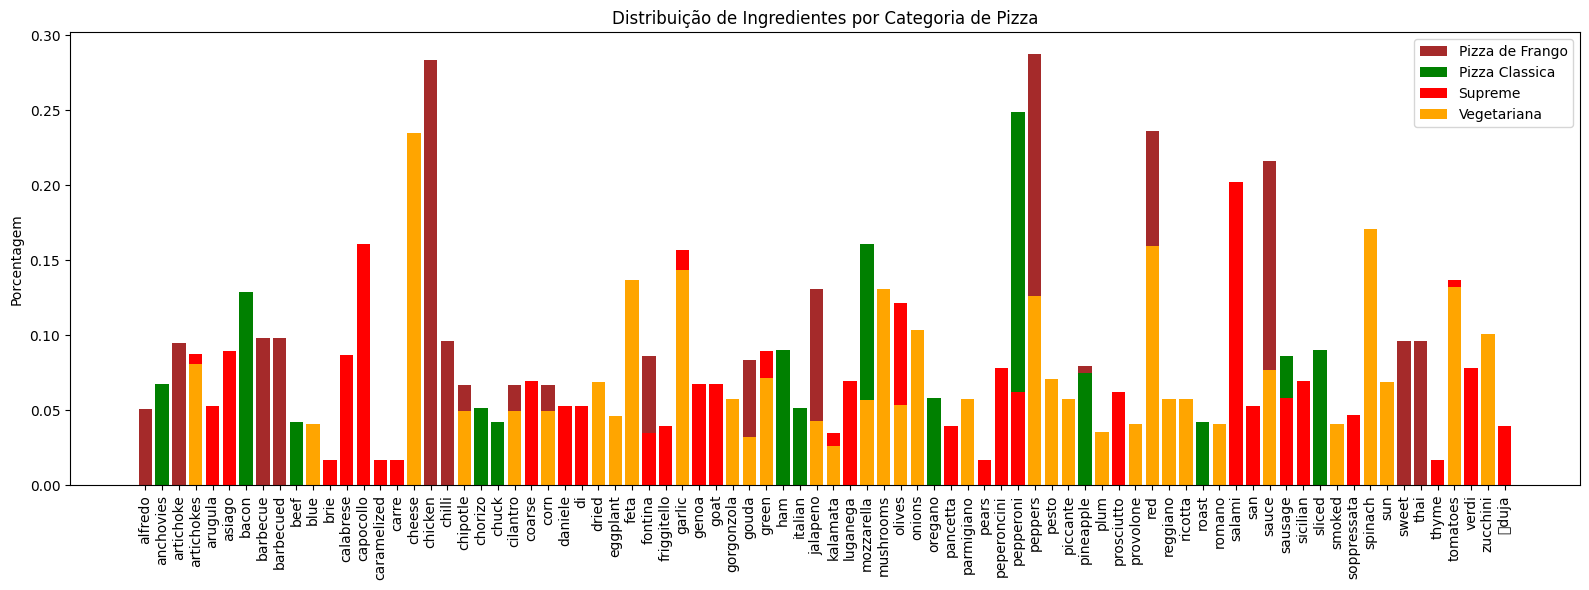

In [ ]:
categories = ['Pizza de Frango', 'Pizza Classica', 'Supreme', 'Vegetariana']
colors = ['brown', 'green', 'red', 'orange']
ingredient_columns = [col for col in encoded_data.columns if col not in categories and col not in ['L', 'M', 'S', 'XL', 'XXL']]
fig, ax = plt.subplots(figsize=(16, 6))
for j, category in enumerate(categories):
    category_means = encoded_data.loc[encoded_data[category] == 1, ingredient_columns].mean()
    ax.bar(range(len(ingredient_columns)), category_means, color=colors[j], label=category)
ax.set_ylabel('Porcentagem')
ax.set_title('Distribuição de Ingredientes por Categoria de Pizza')
ax.set_xticks(range(len(ingredient_columns)))
ax.set_xticklabels(ingredient_columns, rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

**Curva de Elbow**


> Determina o valor ideal de clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

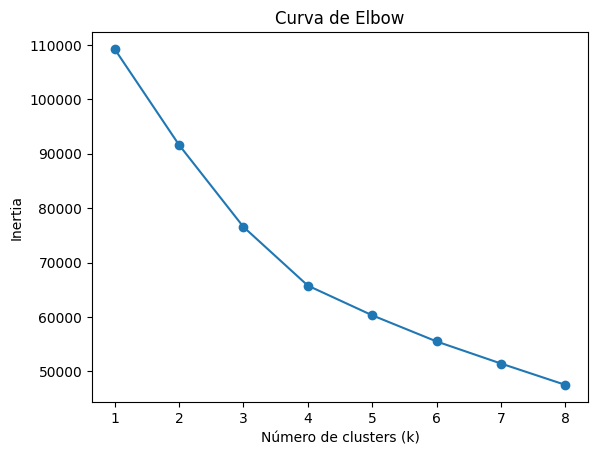

In [ ]:
# Lista vazia para armazenar as inércias
inertias = []

# Testar diferentes valores de k (número de clusters)
for k in range(1, 9):
    # Criar uma instância do KMeans com o número de clusters desejado
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar o modelo aos dados normalizados
    kmeans.fit(encoded_data)
    # Obter a inércia e adicioná-la à lista
    inertias.append(kmeans.inertia_)

# Plotar a curva de elbow
plt.plot(range(1, 9), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Curva de Elbow')
plt.show()

**Aplicando o algoritimo KMeans**


> Setando os clusters do Ebow: Inserindo os valores do Elbow acima

> Treinar o modelo: Treinar o modelo no KMeans

> Obter os rotulos: Os rotulos indicam a qual cluster cada amostra pertece

> Extração dos centroids









In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(encoded_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Silhueta**

> Utilizada para avaliar a coesão e separação dos clusters. Ela varia de -1 a 1

> -1 = pessimo indicador

> 0 = bom indicador

> 1 = excelente indicador









In [ ]:
silhouette_avg = silhouette_score(encoded_data, labels)
print(f"Pontuação de silhueta média: {silhouette_avg}")

Pontuação de silhueta média: 0.28941829714956147


**Gráfico com os agrupamentos**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



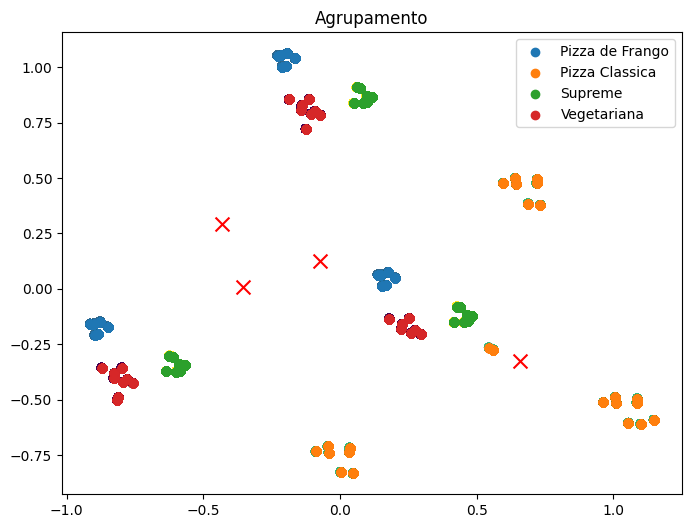

In [ ]:
data_array = encoded_data.values
pca = PCA(n_components=79)
data_pca = pca.fit_transform(data_array)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_pca)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
columns = ["Pizza de Frango", "Pizza Classica", "Supreme", "Vegetariana"]
for i, col in enumerate(columns):
    plt.scatter(data_pca[:, 0][data_array[:, i] == 1], data_pca[:, 1][data_array[:, i] == 1], label=col)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.legend()
plt.title('Agrupamento')
plt.show()

 *Com a forma que foi realizada não conseguimos resultado satisfatório.
Com o resultado é possivel ver que os ingredientes com não está agrupando com os centroids.*
Provavelmente pois são valores muito distantes.

**Limpeza de dados e outliers e adicionando valores faltantes**

In [ ]:
encoded_data['unit_price'] = data['unit_price']
encoded_data

,Pizza de Frango,Pizza Classica,Supreme,Vegetariana,alfredo,anchovies,artichoke,artichokes,arugula,asiago,...,tomatoes,verdi,zucchini,慛duja,L,M,S,XL,XXL,unit_price
0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0,1,0,0,0,13.25
1,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0,1,0,0,0,16.00
2,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,1,0,0,0,0,18.50
3,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.203056,0.0,0.0,0.0,1,0,0,0,0,20.75
4,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.166225,0.0,0.0,0.0,0,1,0,0,0,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,1.0,0.0,0.0,0.0,0.558983,0.000000,0.0,0.0,0.0,0.41921,...,0.000000,0.0,0.0,0.0,0,1,0,0,0,16.75
48616,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,1,0,0,0,0,17.95
48617,0.0,1.0,0.0,0.0,0.000000,0.678334,0.0,0.0,0.0,0.00000,...,0.235924,0.0,0.0,0.0,0,0,1,0,0,12.00
48618,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.166225,0.0,0.0,0.0,1,0,0,0,0,20.25


**Valores monetários estão no formato correto**

In [ ]:
encoded_data['unit_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48620 entries, 0 to 48619
Series name: unit_price
Non-Null Count  Dtype  
--------------  -----  
48620 non-null  float64
dtypes: float64(1)
memory usage: 380.0 KB


**Verificando se existem dados importantes com nenhuma informação**



In [ ]:
print('Colunas         \t      Porcentagem de valores ausentes na coluna')
(encoded_data.isnull().sum() / encoded_data.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem de valores ausentes na coluna


Pizza de Frango    0.0
pesto              0.0
roast              0.0
ricotta            0.0
reggiano           0.0
                  ... 
corn               0.0
coarse             0.0
cilantro           0.0
chuck              0.0
unit_price         0.0
Length: 92, dtype: float64

**Analise dos possiveis Outliers**

In [ ]:
encoded_data.describe().round(2)

,Pizza de Frango,Pizza Classica,Supreme,Vegetariana,alfredo,anchovies,artichoke,artichokes,arugula,asiago,...,tomatoes,verdi,zucchini,慛duja,L,M,S,XL,XXL,unit_price
count,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,...,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00,48620.00
mean,0.22,0.30,0.24,0.24,0.01,0.02,0.02,0.04,0.01,0.03,...,0.11,0.02,0.02,0.01,0.38,0.32,0.29,0.01,0.00,16.49
std,0.42,0.46,0.43,0.42,0.08,0.12,0.09,0.11,0.07,0.11,...,0.10,0.09,0.10,0.07,0.49,0.47,0.45,0.11,0.02,3.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.75
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.75
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.50
75%,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.19,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,20.25
max,1.00,1.00,1.00,1.00,0.56,0.68,0.44,0.37,0.43,0.45,...,0.34,0.49,0.48,0.50,1.00,1.00,1.00,1.00,1.00,35.95


Não encontrei nenhuma possivel inconsistência visivel no dataset
Utilizando um auto-encoder afim de verificar se irá encontrar alguma inconsistência no dataset

Apos varias tentativas, utilizamos um código com uma rede neural chamada **"Auto-Encoder"** onde a mesma utiliza bibliotecas do tensor Flow para avaliar o dataframe e indentificar possiveis inconsistências nos modelos de treinamento.**(mais informações no PDF)**

**Implementando Rede Neural AUTO-ENCODER**

In [ ]:
# Definir os dados de entrada
input_data = np.random.rand(100, 10)  # Exemplo com 100 amostras de 10 dimensões

# Normalizar os dados de entrada
input_data_normalized = (input_data - np.min(input_data)) / (np.max(input_data) - np.min(input_data))

# Definir a arquitetura do Autoencoder
input_dim = input_data.shape[1]  # Número de dimensões dos dados de entrada
encoding_dim = 5  # Número de dimensões da representação codificada

# Definir as camadas do Autoencoder
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder_layer = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder_layer)

# Construir o modelo Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder_layer)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Treinar o modelo
autoencoder.fit(input_data_normalized, input_data_normalized, epochs=10, batch_size=32)

# Utilizar o modelo para codificar os dados de entrada
encoded_data = autoencoder.predict(input_data_normalized)

# Verificar os dados codificados
print(encoded_data)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.0856
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0849
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0843
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0838
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0833
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0829
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0820
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0817
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
[[0.41667426 0.58742887 0.54909986 0.5299993  0.57436675 0.47628155
  0.48491973 0.51209164 0.5304638  0.4778577 ]
 [0.48826092 0.5630454  0.54422534 0.49772975 0.5642278  0.5108601
  0.5492088  0.51266587 0.51744175 0.45574898]
 [0.5041139  0.

**Realizando todo o processo novamente...**

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(encoded_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Calculando novamente o coeficiente da silhueta**

In [ ]:
silhouette_avg = silhouette_score(encoded_data, labels)
print(f"Pontuação de silhueta média: {silhouette_avg}")

Pontuação de silhueta média: 0.3497428596019745


**Plotando novamente o gráfico com os clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



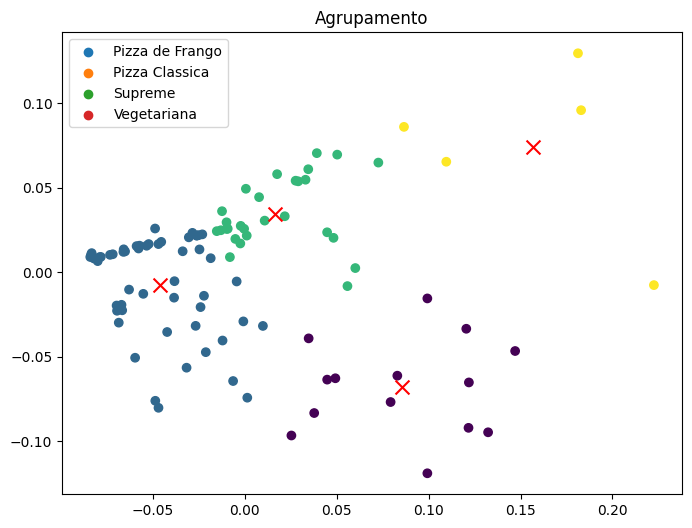

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(encoded_data)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_pca)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
columns = ["Pizza de Frango", "Pizza Classica", "Supreme", "Vegetariana"]
for i, col in enumerate(columns):
    plt.scatter(data_pca[:, 0][encoded_data[:, i] == 1], data_pca[:, 1][encoded_data[:, i] == 1], label=col)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.legend()
plt.title('Agrupamento')
plt.show()

PLOT grafico 3D mostrando:

> 1ª dimensão: preço

> 2ª dimensão: categoria

> 3ª dimensão: tamanho







In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=["Pizza de Frango", "Pizza Classica", "Supreme", "Vegetariana", "L", "M", "S", "XL", "XXL", "unit_price"])
pca = PCA(n_components=3)
data_pca = pca.fit_transform(encoded_data)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_pca)
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    z=data_pca[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color=kmeans.labels_,
        colorscale='Viridis',
        opacity=1,
        line=dict(color='black', width=0.2)
    ),
    hovertext=[f'<br>'.join([f'Ingrediente {i+1}'] + [f'{col}: {val:.2%}' for col, val in encoded_df.iloc[i].items()]) for i in range(len(encoded_df))],
    hoverinfo='text',
    hoverlabel=dict(font=dict(size=12))
))
fig.update_layout(
    title='Agrupamento em 3D',
    scene=dict(
        xaxis_title='Categoria',
        yaxis_title='Tamanho',
        zaxis_title='Preço',
        xaxis=dict(backgroundcolor='black', gridcolor='green', showbackground=True, title=dict(text='Categoria', font=dict(color='white')), tickfont=dict(color='white')),
        yaxis=dict(backgroundcolor='black', gridcolor='green', showbackground=True, title=dict(text='Tamanho', font=dict(color='white')), tickfont=dict(color='white')),
        zaxis=dict(backgroundcolor='black', gridcolor='green', showbackground=True, title=dict(text='Preço', font=dict(color='white')), tickfont=dict(color='white')),
    ),
    hoverlabel=dict(bgcolor='white', font=dict(color='black', size=12))
)
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Salvando o modelo**

In [ ]:
#def generate_report(encoded_df):
    #report = []

    #for _, row in encoded_df.iterrows():
     #   pizza_info = []

      #  for col, val in row.items():
       #     if col.startswith("Pizza"):
        #        ingredient = col.split("Pizza ")[1]
         #       pizza_info.append(f"{ingredient}: {val:.2%}")
          #  elif col in ["Supreme", "Vegetariana", "L", "M", "S", "XL", "XXL", "unit_price"]:
           #     pizza_info.append(f"{col}: {val}")

        #report.append(pizza_info)

    #return report

# Exemplo de uso:
#encoded_df = pd.DataFrame(encoded_data, columns=["Pizza de Frango", "Pizza Classica", "Supreme", "Vegetariana", "L", "M", "S", "XL", "XXL", "unit_price"])

#report = generate_report(encoded_df)

# Exportar para um arquivo xlsx
#df = pd.DataFrame(report)

#df.to_excel("relatorio_pizzas.xlsx", index=False)

**Lendo o modelo salvo**

In [ ]:
data_final = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/relatorio_pizzas.xlsx')

In [ ]:
data_final.head()

,ingredientes,pizza_classica,pizza_supreme,pizza_vegetariana,pizza_large,pizza_media,pizza_pequena,pizza_xl,pizza_xxl,preço
0,alfredo,0.4573,0.483109,0.527561,0.502289,0.503904,0.516049,0.538310,0.557272,13.25
1,anchovies,0.5668,0.509215,0.488406,0.443442,0.540313,0.507903,0.468537,0.515121,16.00
2,artichokes,0.4622,0.477250,0.523461,0.495679,0.513888,0.528599,0.547211,0.567145,18.50
3,arugula,0.6080,0.547106,0.509584,0.396799,0.516452,0.475692,0.458492,0.529660,20.75
4,asiago,0.5135,0.537707,0.554082,0.432341,0.550522,0.475729,0.401426,0.559877,16.00


**Formatando os valores**

In [ ]:
data_final['pizza_classica'] = data_final['pizza_classica'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')
data_final['pizza_supreme'] = data_final['pizza_supreme'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')
data_final['pizza_vegetariana'] = data_final['pizza_vegetariana'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')

In [ ]:
data_final['pizza_large'] = data_final['pizza_large'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')
data_final['pizza_media'] = data_final['pizza_media'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')
data_final['pizza_pequena'] = data_final['pizza_xl'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')
data_final['pizza_xxl'] = data_final['pizza_xxl'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')
data_final['pizza_xl'] = data_final['pizza_xl'].apply(lambda x: '{:,.2f}'.format(x).replace('.', ',') + '%')

**Dataset com os valores formatados**

In [ ]:
data_final

,ingredientes,pizza_classica,pizza_supreme,pizza_vegetariana,pizza_large,pizza_media,pizza_pequena,pizza_xl,pizza_xxl,preço
0,alfredo,"0,46%","0,48%","0,53%","0,50%","0,50%","0,54%","0,54%","0,56%",13.25
1,anchovies,"0,57%","0,51%","0,49%","0,44%","0,54%","0,47%","0,47%","0,52%",16.00
2,artichokes,"0,46%","0,48%","0,52%","0,50%","0,51%","0,55%","0,55%","0,57%",18.50
3,arugula,"0,61%","0,55%","0,51%","0,40%","0,52%","0,46%","0,46%","0,53%",20.75
4,asiago,"0,51%","0,54%","0,55%","0,43%","0,55%","0,40%","0,40%","0,56%",16.00
...,...,...,...,...,...,...,...,...,...,...
76,thyme,"0,52%","0,48%","0,48%","0,48%","0,57%","0,45%","0,45%","0,52%",16.00
77,tomatoes,"0,59%","0,53%","0,51%","0,40%","0,56%","0,43%","0,43%","0,54%",9.75
78,verdi,"0,63%","0,53%","0,49%","0,38%","0,58%","0,43%","0,43%","0,54%",12.00
79,zucchini,"0,58%","0,52%","0,50%","0,43%","0,53%","0,47%","0,47%","0,52%",20.25


**Resultado Final**

In [ ]:
colunas = ['pizza_classica', 'pizza_supreme', 'pizza_vegetariana', 'pizza_large', 'pizza_media', 'pizza_pequena', 'pizza_xl', 'pizza_xxl', 'preço']
dados_ingredientes = data_final['ingredientes']
dados_grafico = data_final[colunas]
def buscar_dados_por_ingrediente(ingrediente):
    filtro = data_final['ingredientes'] == ingrediente
    dados_filtrados = dados_grafico.loc[filtro]
    if not dados_filtrados.empty:
        display(dados_filtrados)
    else:
        print("Nenhum dado encontrado para o ingrediente especificado.")
caixa_texto = widgets.Text(description='Ingrediente:')
botao_buscar = widgets.Button(description='Buscar')
def buscar_ingrediente(_):
    ingrediente = caixa_texto.value
    buscar_dados_por_ingrediente(ingrediente)
botao_buscar.on_click(buscar_ingrediente)
display(caixa_texto, botao_buscar)

Text(value='', description='Ingrediente:')

Button(description='Buscar', style=ButtonStyle())

,pizza_classica,pizza_supreme,pizza_vegetariana,pizza_large,pizza_media,pizza_pequena,pizza_xl,pizza_xxl,preço
77,"0,59%","0,53%","0,51%","0,40%","0,56%","0,43%","0,43%","0,54%",9.75
